<a href="https://colab.research.google.com/github/mykhailodolitsoi/EDU_pytorch/blob/main/01_overall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy
from torch import nn

In [ ]:
# creating synthetic data
SD_weight = 0.9
SD_bias = 0.3

start = 0
end = 10
step = 0.05

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = X * SD_weight + SD_bias

X[-5:], y[-5:]

(tensor([[9.7500],
         [9.8000],
         [9.8500],
         [9.9000],
         [9.9500]]),
 tensor([[9.0750],
         [9.1200],
         [9.1650],
         [9.2100],
         [9.2550]]))

In [ ]:
# train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [ ]:
# plot the data
def plot_predictions(data_train = X_train,
                     label_train = y_train,
                     data_test = X_test,
                     label_test = y_test,
                     preds = None):

    plt.figure(figsize=(10, 7))

    plt.scatter(data_train, label_train, c="r", s=4, label="Train data")
    plt.scatter(data_test, label_test, c="b", s=4, label="Test data")

    if preds is not None:
        plt.scatter(data_test, preds, c="g", s=4, label="Predictions")

    plt.legend(prop={"size": 14})
    plt.grid()

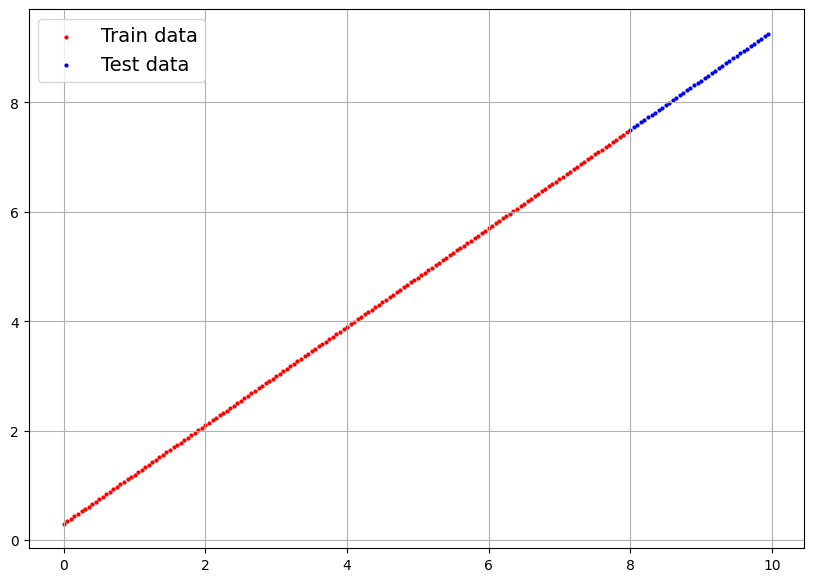

In [ ]:
plot_predictions()

In [ ]:
class LRM(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.fc1(x)

In [ ]:
torch.manual_seed(0)

model = LRM()

model.state_dict()

OrderedDict([('fc1.weight', tensor([[-0.0075]])),
             ('fc1.bias', tensor([0.5364]))])

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [ ]:
epochs=150

epoch_count=[]
train_loss_values=[]
test_loss_values=[]

for epoch in range(epochs):
    model.train()

    optimizer.zero_grad()

    y_preds = model(X_train)

    loss = loss_fn(y_preds, y_train)

    loss.backward()

    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_preds = model(X_test)

        test_loss = loss_fn(test_preds, y_test)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.item())
        test_loss_values.append(test_loss.item())
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

y_preds = test_preds

Epoch: 0 | Train loss: 3.380042314529419 | Test loss: 7.54308557510376
Epoch: 10 | Train loss: 1.7374560832977295 | Test loss: 3.9089436531066895
Epoch: 20 | Train loss: 0.2932993471622467 | Test loss: 0.5644468069076538
Epoch: 30 | Train loss: 0.15327249467372894 | Test loss: 0.220455139875412
Epoch: 40 | Train loss: 0.1364973783493042 | Test loss: 0.1989051103591919
Epoch: 50 | Train loss: 0.11971746385097504 | Test loss: 0.17094770073890686
Epoch: 60 | Train loss: 0.10295494645833969 | Test loss: 0.1431572139263153
Epoch: 70 | Train loss: 0.08617595583200455 | Test loss: 0.12278278172016144
Epoch: 80 | Train loss: 0.07432594895362854 | Test loss: 0.2252216786146164
Epoch: 90 | Train loss: 0.05668620392680168 | Test loss: 0.0925588384270668
Epoch: 100 | Train loss: 0.04966660961508751 | Test loss: 0.27813345193862915
Epoch: 110 | Train loss: 0.03676300868391991 | Test loss: 0.15940070152282715
Epoch: 120 | Train loss: 0.029341328889131546 | Test loss: 0.2008415162563324
Epoch: 130 | 

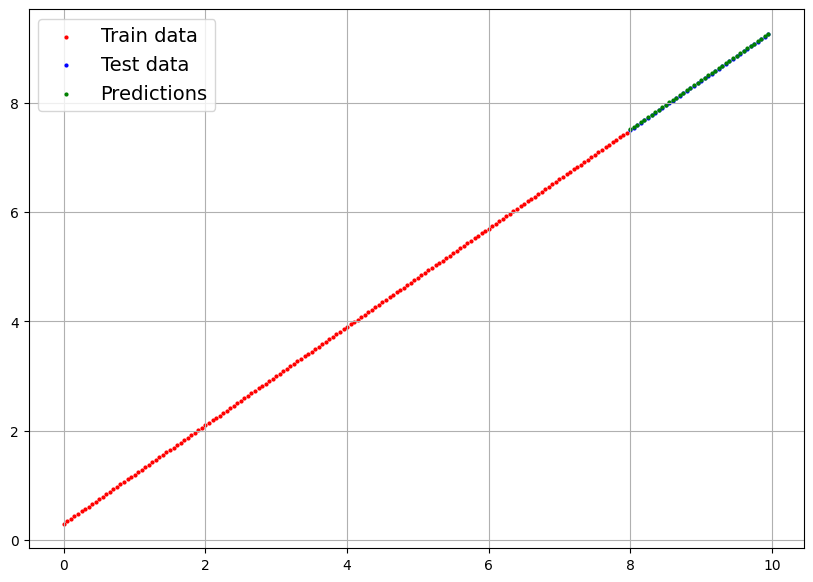

In [ ]:
plot_predictions(preds = y_preds)

Text(0.5, 0, 'Epochs')

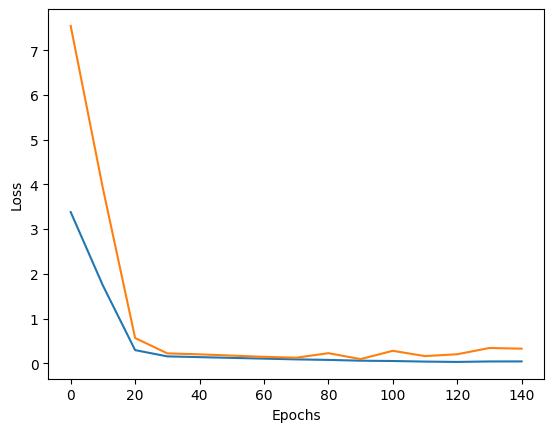

In [ ]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Train loss")

plt.ylabel("Loss")
plt.xlabel("Epochs")